In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils

In [ ]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [ ]:
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')

In [ ]:
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

In [ ]:
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])

In [ ]:
SOM.build_SOM()

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.SOM[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)

In [ ]:
weight_vectors = SOM.data[random_idx]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    chi_sq_dist = mpdg_som_utils.chi_sq_dist(weight_vectors[*iteration_map.multi_index],
                                             SOM.data[45],
                                             data_dim = 3)
    distances[*iteration_map.multi_index] = chi_sq_dist


argmin_idx = np.argmin(distances)
argmin_coords = np.unravel_index(argmin_idx, SOM.mapsize)

In [ ]:
np.shape(weight_vectors)[:-1]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    euclid_dist = np.linalg.norm(np.array(argmin_coords) -\
                                 np.array(iteration_map.multi_index))
    distances[*iteration_map.multi_index] = euclid_dist

In [ ]:
argmin_coords

In [ ]:
plt.imshow(np.exp(-distances**2/3))

In [ ]:
count = 0
for i, _ in enumerate(np.shape(n_dim_map)):
    for ii in range(np.shape(n_dim_map)[i]):
        count += 1
        print(count)

In [ ]:
[mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors[ii, jj],
                           data_vector = SOM.data[0],
                           data_dim = 3) for ii in ]
mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors,
                           data_vector = SOM.data[0],
                           data_dim = 3)

In [ ]:
if (~use_covariance) & (data_dim is not None):
    covar_matrix = np.diagflat([1] * data_dim)

elif (~use_covariance) & (data_dim is None):
    raise(ValueError('Please pass a dimensionality for the data (number of variables).'))

elif (use_covariance) & (covar_vector is None):
    raise(ValueError('There is no covariance matrix for the given data vector!'))

covar_matrix = np.diagflat(covar_vector)
inv_covar_matrix = linalg.inv(covar_matrix)

vector_difference = data_vector - weight_vector

np.dot(np.dot(vector_difference, inv_covar_matrix),vector_difference)

In [ ]:
for i in np.nditer

In [ ]:
plt.imshow(np.ones(SOM.mapsize))

___

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])
SOM.build_SOM()
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)
weight_vectors = SOM.data[random_idx]

In [ ]:
step0_weights = weight_vectors.copy()

In [ ]:
step = 1
step1_weights = mpdg_som_utils.training_step(step0_weights,
                                             SOM.data[0],
                                             SOM.variances[0],
                                             step,
                                             mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                             (1000, 0.5),
                                             mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                             (SOM.mapsize, 2))


In [ ]:
step = 1
step1_weights = step0_weights
for index in range(SOM.data_len):
    step1_weights = mpdg_som_utils.training_step(step1_weights,
                                                 SOM.data[index],
                                                 SOM.variances[index],
                                                 step,
                                                 mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                                 (1000, 0.5),
                                                 mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                                 (SOM.mapsize, 2))

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step0_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step1_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
np.max(step1_weights - step0_weights)

___

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap

In [2]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [24]:
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_vars = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

input_labels = GAMA_vect_data['log_stellar_mass', 'redshift']

tuple_labels = input_labels.as_array()
list_labels = [list(values) for values in tuple_labels]
input_labels = np.array(list_labels)

In [4]:
normalization_params = {}

for variable in input_data.keys():
    normalization_params[variable] = {}

    normalization_params[variable]['mean'] = np.mean(GAMA_vect_data[variable])
    normalization_params[variable]['std']  = np.std(GAMA_vect_data[variable])

In [5]:
normalized_input_data = input_data.copy()
for variable in input_data.keys():
    
    normalized_input_data[variable] -= normalization_params[variable]['mean']
    normalized_input_data[variable] /= normalization_params[variable]['std']

In [6]:
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'pca',
                        maximum_steps = 100)

data_cut = 1000

SOM.load_data(normalized_input_data[:data_cut],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

SOM.load_standard_deviations(input_vars[:data_cut])

SOM.build_SOM()

| Data statistics 
stat	r_mag	gr_color	surf_bright_r	
min	-9.845	-4.797	-4.918	
max	2.086	3.339	3.329	
mean	0.006	0.029	-0.038	
median	0.206	0.049	-0.153	
std	1.034	1.041	1.009	
| SOM. Step 0. Initialization: pca


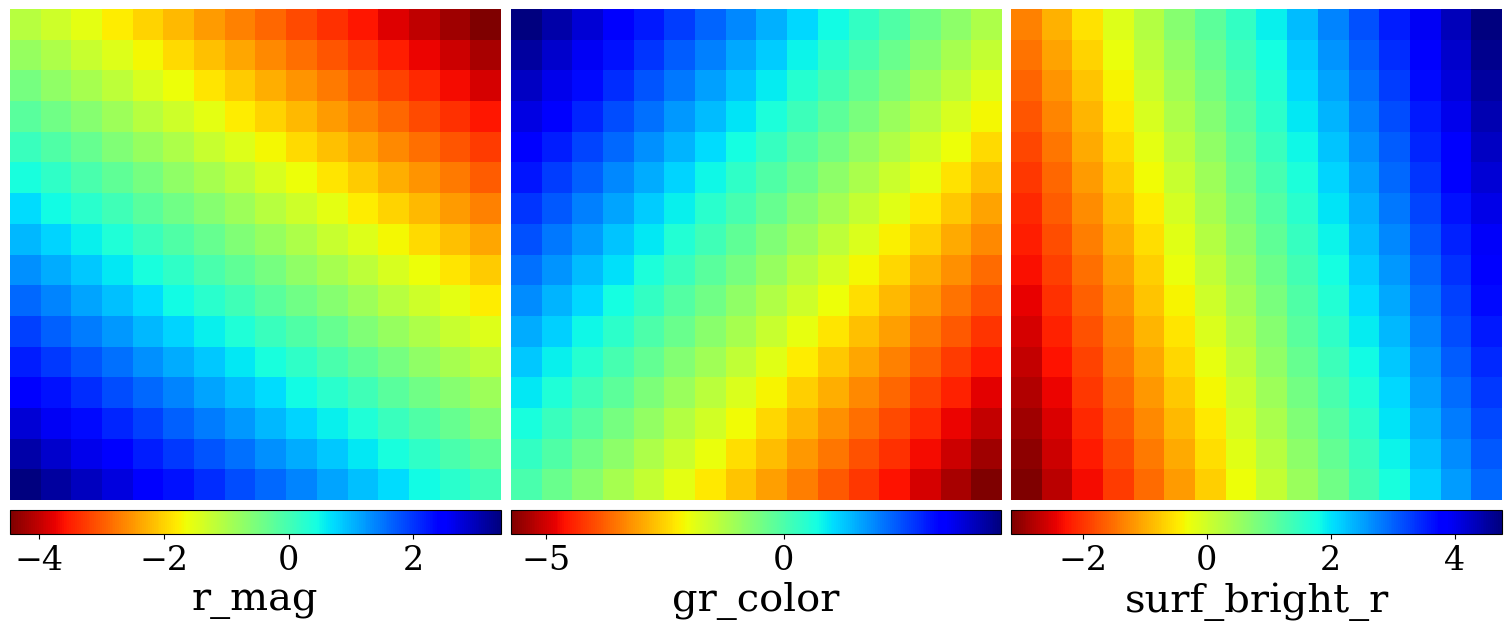

In [7]:
SOM.data_statistics()
SOM.show_map()

In [8]:
SOM.train(debug_max_steps = 1,
          error_thresh = 1)

Step 0 complete. Error: 29.367
Step 1 complete. Error: 15.220
Step 2 complete. Error: 40.229
Step 3 complete. Error: 27.030
Step 4 complete. Error: 17.848
Step 5 complete. Error: 29.265
Step 6 complete. Error: 38.907
Step 7 complete. Error: 31.840
Step 8 complete. Error: 15.906
Step 9 complete. Error: 17.184
Step 10 complete. Error: 17.945
Step 11 complete. Error: 19.097
Step 12 complete. Error: 44.771
Step 13 complete. Error: 42.549
Step 14 complete. Error: 28.738
Step 15 complete. Error: 37.750
Step 16 complete. Error: 34.412
Step 17 complete. Error: 27.334
Step 18 complete. Error: 45.331
Step 19 complete. Error: 28.720
Step 20 complete. Error: 15.989
Step 21 complete. Error: 46.075
Step 22 complete. Error: 44.735
Step 23 complete. Error: 38.369
Step 24 complete. Error: 18.251
Step 25 complete. Error: 40.343
Step 26 complete. Error: 41.963
Step 27 complete. Error: 15.252
Step 28 complete. Error: 26.795
Step 29 complete. Error: 41.868
Step 30 complete. Error: 17.669
Step 31 complete. 


| SOM. Step 100. Initialization: pca


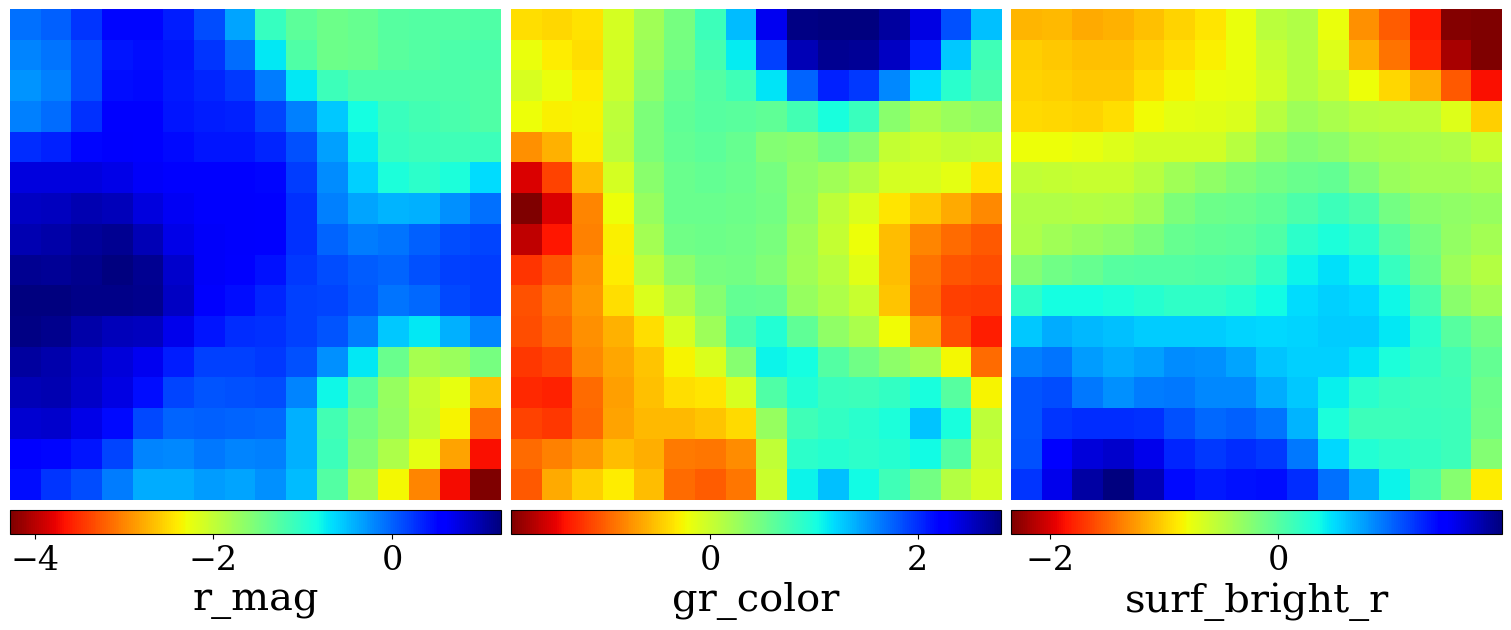

In [9]:
SOM.show_map()

In [10]:
SOM.label_map(input_labels[:data_cut],
              parameter_names = ['log_mstar', 'redshift'])

| SOM after training. Step 100.


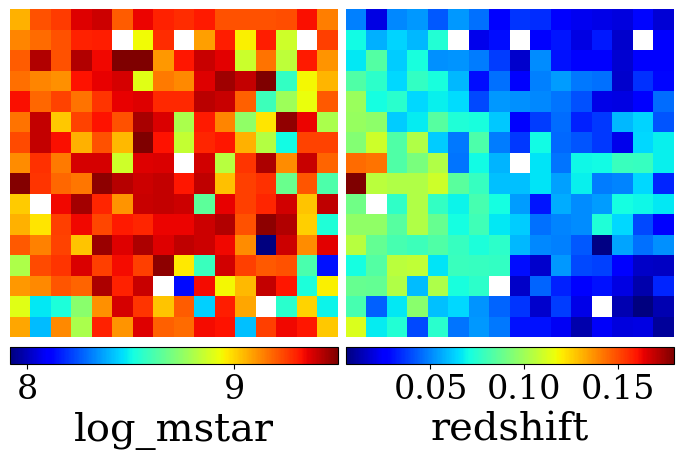

In [14]:
print(f'| SOM after training. Step {SOM.step}.')
fig = plt.figure(figsize = (10, 10), constrained_layout = True)
for i, name in enumerate(SOM.parameter_names):
    ax = fig.add_subplot(1, 3, i + 1)
    imsh = ax.imshow(SOM.map_labels[..., i], origin = 'lower', cmap = 'jet')
    # ax.set_title(SOM.variable_names[i],
    #              fontsize = 12)
    ax.axis('off')
    
    fig.colorbar(mappable = imsh, ax = ax,
                 label = SOM.parameter_names[i], location = 'bottom',
                 pad = 0.01)

In [15]:
som_output = np.array([SOM.map_labels[*idx] for idx in SOM.bmu_indices])

In [32]:
z_outlier_vals = np.abs(som_output[:, 1] - input_labels[:, 1][:data_cut])/(1 + input_labels[:, 1][:data_cut])
z_outlier_frac = np.sum(z_outlier_vals > 0.15)/len(z_outlier_vals)

In [33]:
z_outlier_frac

0.0

In [45]:
log_mstar = np.median(np.abs(som_output[:, 0] - input_labels[:data_cut, 0]))

0.11382627487182617

In [52]:
log_mstar_mad, z_mad = np.median(np.abs(som_output - input_labels[:data_cut]), axis = 0)

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
/var/tmp/lsajkov/ipykernel_2865502/1124561129.py:9: SyntaxWarning: invalid escape sequence '\m'
  location = 'top', pad = 0, label = '$N_{\mathrm{galaxies}}$')
/var/tmp/lsajkov/ipykernel_2865502/1124561129.py:14: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('GAMA log$_{10}(M_*/M_{\odot})$\nTrue')
/var/tmp/lsajkov/ipykernel_2865502/1124561129.py:15: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('Predicted\nSOM log$_{10}(M_*/M_{\odot})$')


Text(0.65, 0.01, 'MAD: 0.114 dex')

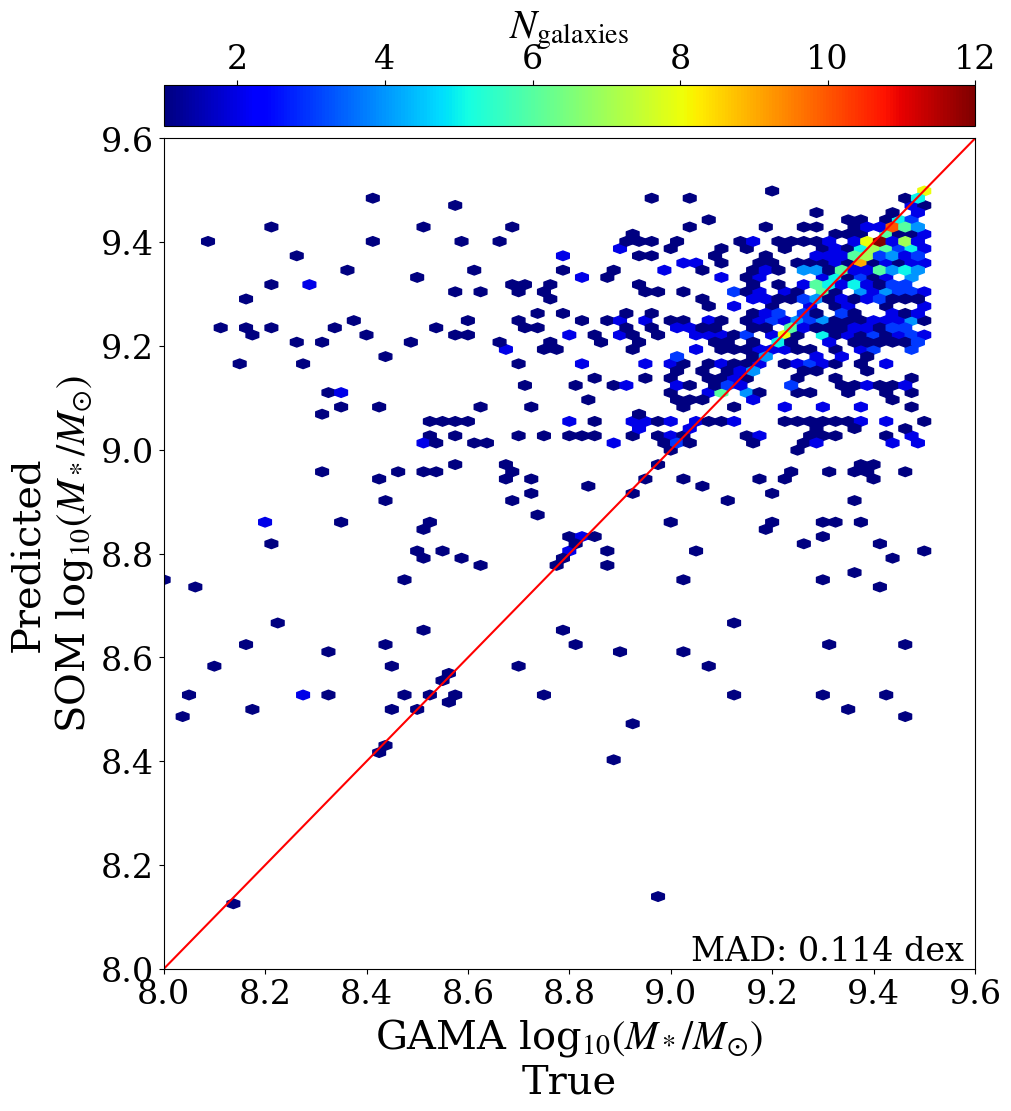

In [58]:
fig = plt.figure(figsize = (10, 11), constrained_layout = True)
ax = fig.add_subplot()

hb = ax.hexbin(input_labels[..., 0][:data_cut],
               som_output[..., 0],
               mincnt = 1, cmap = 'jet')

fig.colorbar(mappable = hb, ax = ax,
             location = 'top', pad = 0, label = '$N_{\mathrm{galaxies}}$')

ax.set_xlim(8, 9.6)
ax.set_ylim(8, 9.6)

ax.set_xlabel('GAMA log$_{10}(M_*/M_{\odot})$\nTrue')
ax.set_ylabel('Predicted\nSOM log$_{10}(M_*/M_{\odot})$')

ax.axline([0, 0], slope = 1, color = 'red')
ax.text(0.65, 0.01,
       f'MAD: {log_mstar_mad:.3f} dex',
       ma = 'right',
       transform = ax.transAxes)

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_2865502/3069718838.py:9: SyntaxWarning: invalid escape sequence '\m'
  location = 'top', pad = 0.02, label = '$N_{\mathrm{galaxies}}$')


Text(0.65, 0.01, 'MAD: 0.008 dex')

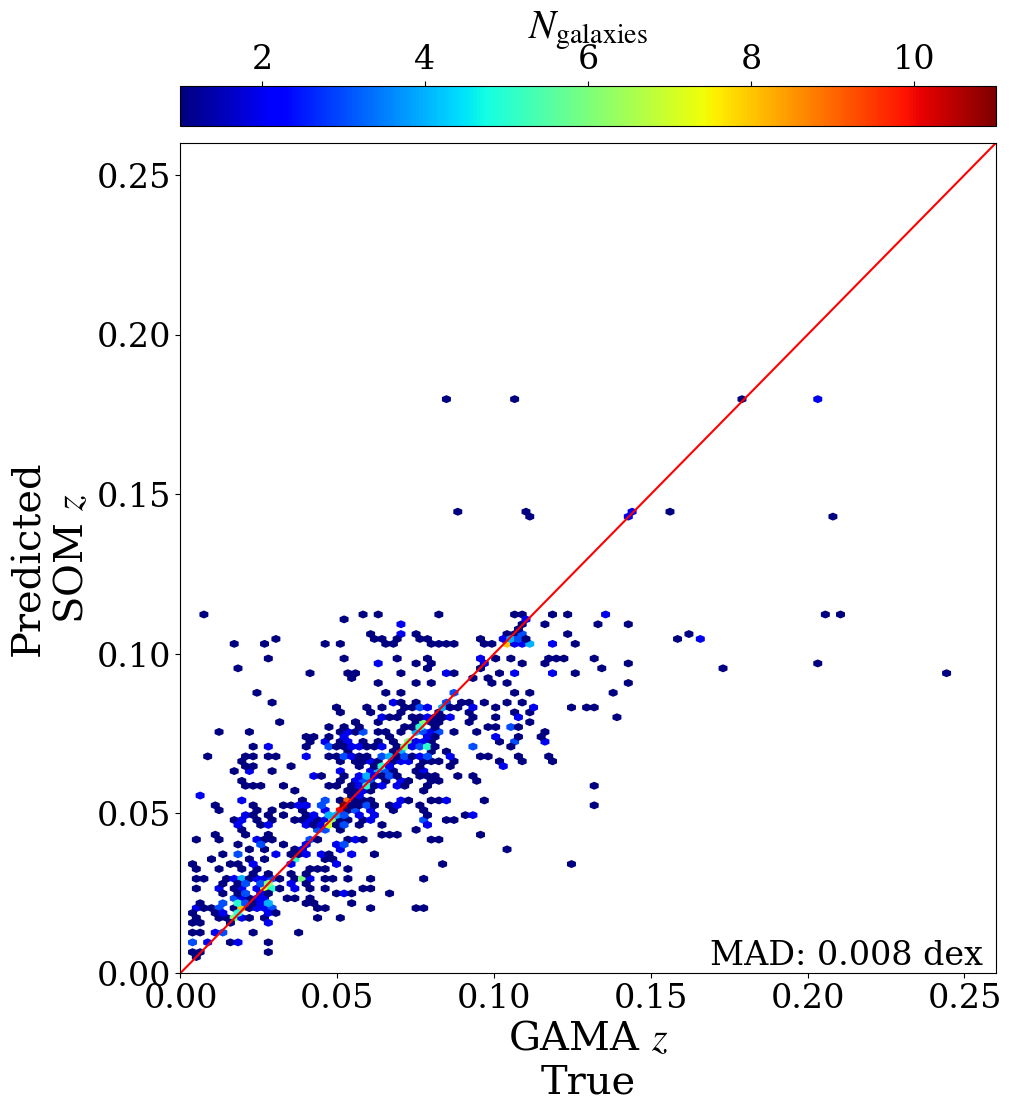

In [64]:
fig = plt.figure(figsize = (10, 11), constrained_layout = True)
ax = fig.add_subplot()

hb = ax.hexbin(input_labels[..., 1][:data_cut],
               som_output[..., 1],
               mincnt = 1, cmap = 'jet')

fig.colorbar(mappable = hb, ax = ax,
             location = 'top', pad = 0.02, label = '$N_{\mathrm{galaxies}}$')

ax.set_xlim(0, 0.26)
ax.set_ylim(0, 0.26)

ax.set_xlabel('GAMA $z$\nTrue')
ax.set_ylabel('Predicted\nSOM $z$')

ax.axline([0, 0], slope = 1, color = 'red')
ax.text(0.65, 0.01,
       f'MAD: {z_mad:.3f} dex',
       ma = 'right',
       transform = ax.transAxes)

In [ ]:
np.shape(SOM.map_labels)

In [ ]:
populated_cells = np.unique(SOM.bmu_indices, axis = 0)

In [ ]:
np.all(SOM.bmu_indices == (populated_cells[33]), axis = -1)

In [ ]:
np.equal(SOM.bmu_indices, populated_cells[33],
         )

In [ ]:
plt.imshow(SOM.map_labels[..., 0])

In [ ]:
plt.scatter(populated_cells[:, 0], populated_cells[:, 1])

In [ ]:
SOM.bmu_indices

In [ ]:
np.sum(SOM.bmu_indices == [5, 3], axis = -1) == 2

In [ ]:
populated_cells[0]

In [ ]:
matching_idx

In [ ]:
(SOM.map_labels)

In [ ]:
SOM.map_labels[*populated_cells[0]]

In [ ]:
populated_cells[0]

In [ ]:
for cell in populated_cells:
    print(cell)

In [ ]:
(SOM.parameters)

___

Build mapping function

In [ ]:
idx = SOM.bmu_indices.copy()

In [ ]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()

ax.scatter(idx[..., 0], idx[..., 1])
ax.axis('off')

In [ ]:
populated_cells = np.unique(idx, axis = 0)

In [ ]:
parameters = input_labels
tuple_params = parameters.as_array()
list_params = [list(values) for values in tuple_params]
parameters = np.array(list_params)

In [ ]:
np.median(parameters, axis = 0)

In [ ]:
np.median(parameters[:, 0])

In [ ]:
np.median(input_labels[:10], axis = 0)

In [ ]:
len(matching_idx)

In [ ]:
sum_of_cells = 0
for cell in populated_cells:
    print(cell)
    matching_idx = np.sum(idx == cell, axis = -1) == SOM.map_dimensionality
    

___

Build error estimator

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

hb = ax.hexbin(bmu_idx[:, 0], bmu_idx[:, 1], gridsize = [16, 8])
fig.colorbar(mappable = hb, label = 'datapoints')

In [ ]:
weight_vectors = SOM.weights_map.copy()

In [ ]:
max_quant_error = 0
for index in range(SOM.data_len):
    quant_error = np.dot(SOM.data[index], SOM.weights_map[*SOM.bmu_indices[index], :])
    if quant_error > max_quant_error: max_quant_error = quant_error

In [ ]:
quant_error

In [ ]:
SOM.bmu_indices[0]